In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-sindhi'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مان هڪ منهنجو نيگا رويو سوووو خراب آهي پر هو هميشه غار پهرين cus he kno I stand on bus but lutely 😂🤣 1
@khawarkhatana @ashoswai توهان کي پنهنجي نفرت ۽ حسد سان توهان کي ٿورو اسلامو فوبڪ POS ڏسو، لکين هندو مسلمان قومن ۾ رهن ٿا، يهودي تاريخي طور تي مسلمانن سان امن ۾ رهندا آهن، اڄ به انهن کي ڪيترن ئي مسلمان ۽ عرب ملڪن ۾ ڀليڪار آهي، اهو مذهب بابت ناهي، اسان ساڳيا آهيون... https://t.co/NvrFlxZucP 1
@dartwalker @GraniteElements توهان کي گهرجي!
مون هن کي ڪرسمس تي ٻاهر ڪڍيو - اهو منهنجي سلائي بيگ ۾ سالن کان اڻڄاتل هو 0
@EstherMcVey1 اسان انهن جو جواب ٻڌڻ جا منتظر آهيون (جيڪو به سوال اهي تصور ڪندا ته توهان پڇيو) 0
هي ڏاڍو عجيب آهي.  مان هن پروجيڪٽ کان متاثر آهيان، اميد آهي ته هن واقعي سان ڪميونٽي ۽ خاص طور تي هي سڪو ڪاميابي حاصل ڪندو.، https://t.co/wB5RQb0EYJ 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

منهنجو نيگا رويو سوووو خراب آهي پر هميشه غار پهرين cus he kno i stand on bus but lutely 😂🤣 1
khawarkhatana ashoswai کي پنهنجي نفرت حسد سان کي ٿورو اسلامو فوبڪ pos ڏسو، لکين هندو مسلمان قومن ۾ رهن ٿا، يهودي تاريخي طور مسلمانن سان امن ۾ رهندا آهن، انهن کي ڪيترن ئي مسلمان عرب ملڪن ۾ ڀليڪار آهي، مذهب بابت ناهي، اسان ساڳيا آهيون 1
dartwalker graniteelements کي گهرجي مون هن کي ڪرسمس ٻاهر ڪڍيو منهنجي سلائي بيگ ۾ سالن کان اڻڄاتل 0
esthermcvey1 اسان انهن جو جواب ٻڌڻ جا منتظر آهيون جيڪو تصور ڪندا ته پڇيو 0
ڏاڍو عجيب آهي هن پروجيڪٽ کان متاثر آهيان، اميد آهي ته هن واقعي سان ڪميونٽي خاص طور سڪو ڪاميابي حاصل ڪندو، 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 478/478 [02:42<00:00,  2.95it/s, loss=0.384]


Train loss 0.39674933703624055 accuracy 0.8057490434611989
Validation loss 0.34248399529606105 accuracy 0.8407240262925537
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8407240262925537
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  3.01it/s, loss=0.358]


Train loss 0.32080416693098873 accuracy 0.8511396710160568
Validation loss 0.32996530253440143 accuracy 0.847934857254979
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.847934857254979
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 478/478 [02:40<00:00,  2.98it/s, loss=0.289]


Train loss 0.27969527995860727 accuracy 0.8739003891559567
Validation loss 0.34148616725578906 accuracy 0.847934857254979
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  2.99it/s, loss=0.256]


Train loss 0.24165745148100115 accuracy 0.8926714411851271
Validation loss 0.3537068320438266 accuracy 0.8488668694201904
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8488668694201904
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 478/478 [02:40<00:00,  2.98it/s, loss=0.195]


Train loss 0.21059997967409289 accuracy 0.9084829458124857
Validation loss 0.40237781731411815 accuracy 0.8464142058275287
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  3.00it/s, loss=0.146] 


Train loss 0.1784113586167162 accuracy 0.9256679420517349
Validation loss 0.38839071672409775 accuracy 0.8409692926518199
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  3.00it/s, loss=0.1]   


Train loss 0.15207208671985062 accuracy 0.9371464076653914
Validation loss 0.44488555621355774 accuracy 0.8334641420582753
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  3.00it/s, loss=0.0725]


Train loss 0.12709887226786323 accuracy 0.9477746165669251
Validation loss 0.47680074740201234 accuracy 0.8460708329245561
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  3.00it/s, loss=0.0724]


Train loss 0.10896596389678483 accuracy 0.9553451715229406
Validation loss 0.5334043269976974 accuracy 0.8442558618659864
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


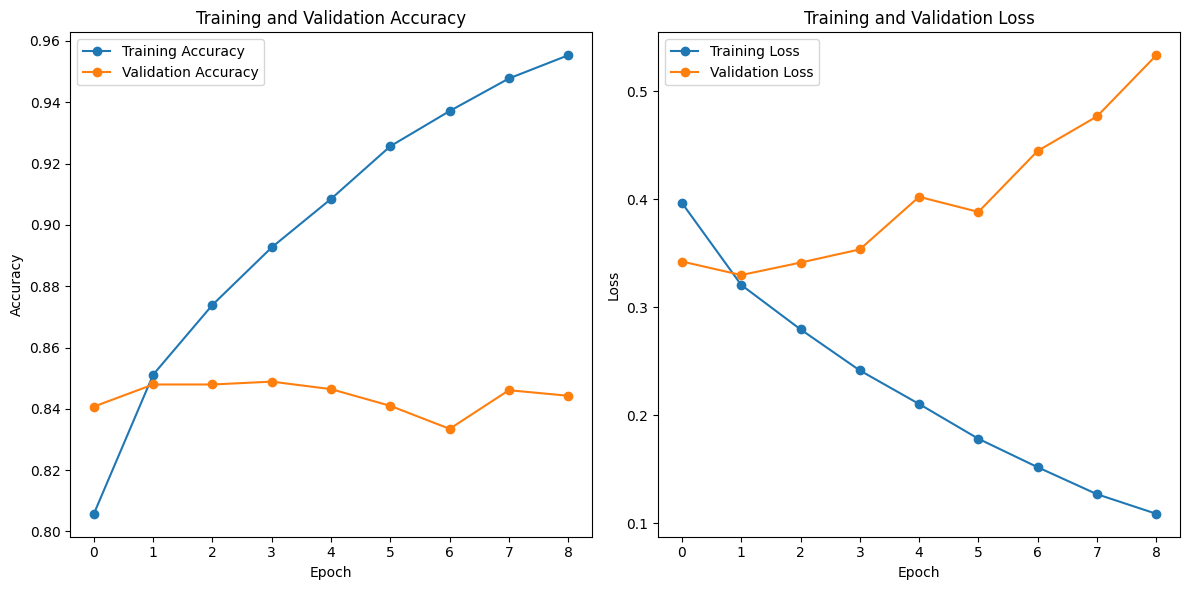

In [9]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [11]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.8505910629322608 Test Loss: 0.34405590379610657


Accuracy: 0.85
F1 Score: 0.85
Precision: 0.85
Recall: 0.85

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.87      0.84      0.85     10551
        Hate       0.83      0.87      0.85      9836

    accuracy                           0.85     20387
   macro avg       0.85      0.85      0.85     20387
weighted avg       0.85      0.85      0.85     20387



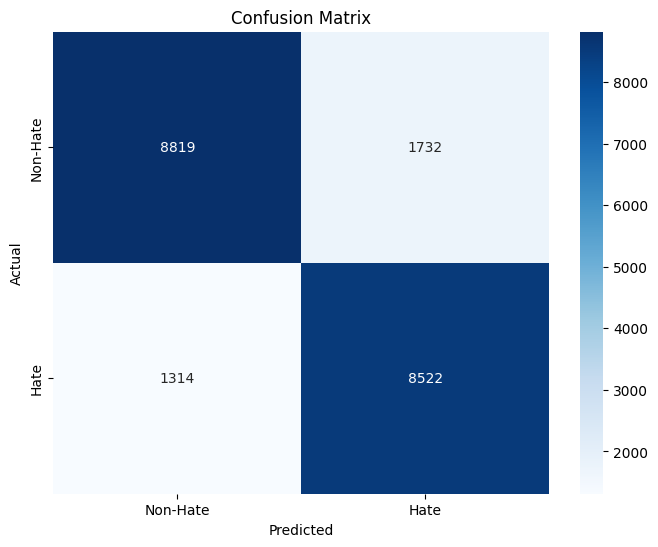

In [12]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [13]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.60
